# Assignment 6

## Generating values according to a probability distribution 

In this part of the assignment you will create a function to generate values of $x$ between 0 and 10 distributed according to 

$$ \frac{1}{\mathcal{N}} \left( 1 + \frac{2}{1+x^2}+ \sin(\sqrt{3 x})^2\right) $$

with 

$$ \mathcal{N} = \int\limits_0^{10} f(x) dx \;.$$

Let's first import the usual suspects:

In [23]:
import matplotlib.pyplot as plt
import numpy
import random

This defines the function:

In [24]:
norm = (181 + 24*numpy.arctan(10)-numpy.cos(2*numpy.sqrt(30))-2*numpy.sqrt(30)*numpy.sin(2*numpy.sqrt(30)))/12

def f(x):
    return  (1 + (2/(1+x**2)+ numpy.sin(numpy.sqrt(3*x))**2))/norm

This plots the function:

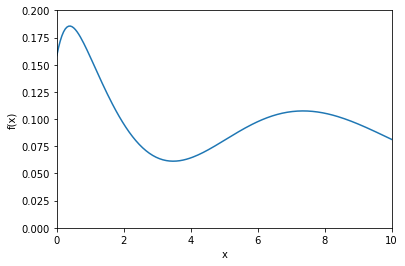

In [25]:
xs = numpy.linspace(0, 10, 200)
fs = f(xs)
plt.plot(xs, fs);
plt.ylabel('f(x)')
plt.xlabel('x')
plt.xlim(0,10)
plt.ylim(0,0.2);

Define a function `genSample` that generates a sample of `npts` values $x$ distributed according to $f(x)$. [5 marks]


In [26]:
def genSample(npts):
    sample = []
    m=0.200
    while len(sample)<npts:
        random_x=numpy.random.uniform(0.0,10.0)
        random_r=numpy.random.uniform(0.0,1.0)
        if m*random_r<f(random_x):
            sample.append(random_x)
        
    
    # YOUR CODE HERE

    return numpy.array(sample)

In [27]:
# this test is worth 1 mark
testSample = genSample(103)
assert (testSample >= 0).all() 
assert (testSample <= 10).all()
assert len(testSample) == 103

## Plotting task

Make a plot to show that the values generated are distributed in the right manner. The plot should have a title and axis labels. [4 marks]


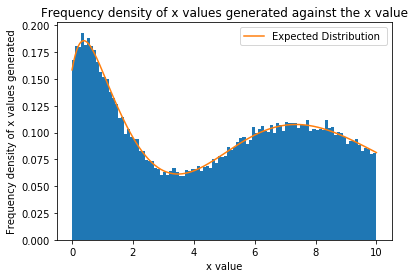

In [32]:
number_samples=100000
my_random_values= genSample(number_samples)
xs = numpy.linspace(0, 10, 200)
fs = f(xs)
plt.figure()
plt.hist(my_random_values,density="True",bins=100)
plt.xlabel("x value")
plt.ylabel("Frequency density of x values generated")
plt.title("Frequency density of x values generated against the x value")
plt.plot(xs,fs,label="Expected Distribution ")
plt.legend()
plt.show()